### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Load Data

In [3]:
df = pd.read_csv('../data/raw/retail_price.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (676, 30)


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


### Price Variance Check

In [4]:
price_stats = df.groupby('product_id')['unit_price'].agg(['count', 'min', 'max', 'nunique', 'std'])

# Filter products with static prices (std = 0 or NaN)
static_products = price_stats[price_stats['std'].fillna(0) == 0]
dynamyc_product = price_stats[price_stats['std'] > 0]

print("\nProduct Summary:")
print(f"Total Unique Products: {len(price_stats)}")
print(f"Static Price Products: {len(static_products)}")
print(f"Dynamic Pricing Products: {len(dynamyc_product)}")

print("\nTop 5 Products with the Highest Price Variations:")
dynamyc_product.sort_values('std', ascending=False).head(5)


Product Summary:
Total Unique Products: 52
Static Price Products: 2
Dynamic Pricing Products: 50

Top 5 Products with the Highest Price Variations:


,count,min,max,nunique,std
product_id,,,,,
watches7,12,169.349318,348.80,11,56.544916
watches8,10,145.166667,239.90,9,39.547611
watches1,17,132.531250,255.61,17,35.949022
computers5,8,77.155000,167.00,7,29.974583
watches6,14,103.792523,163.00,14,20.949804


### Price Variance Analysis
Based on the `Top 5 Products` table, we identified the best candidate for modeling:
* **Top Candidate:** Product `watches7` exhibits the highest standard deviation (**std**) of ~56.5.
* **Interpretation:** This product has a history of aggressive price fluctuations.
* **Technical Implication:** Machine Learning models require variance to learn patterns. If prices were static (std = 0), the algorithm would fail to learn price elasticity. This data is **highly suitable** for Dynamic Pricing.

### Quick Correlation Visualization (Elasticity Check)

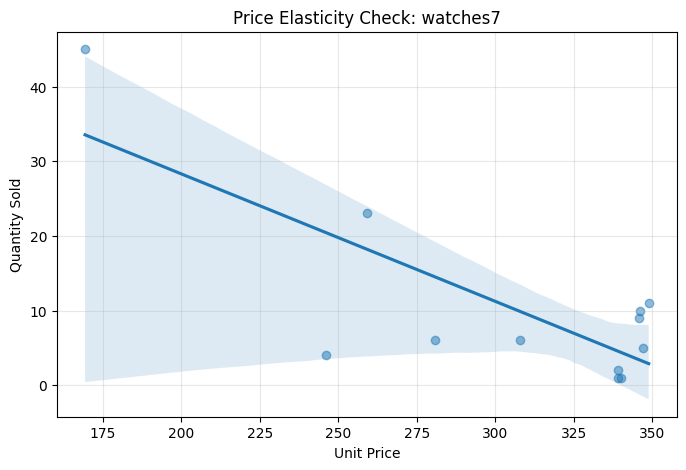

In [5]:
if not dynamyc_product.empty:
  sample_id = dynamyc_product['std'].idxmax()
  df_sample = df[df['product_id'] == sample_id]

  plt.figure(figsize=(8, 5))
  sns.regplot(data=df_sample, x='unit_price', y='qty', scatter_kws={'alpha':0.5})
  plt.title(f"Price Elasticity Check: {sample_id}")
  plt.xlabel('Unit Price')
  plt.ylabel('Quantity Sold')
  plt.grid(True, alpha=0.3)
  plt.show()
else:
  print("The data does not show any price variation at all.")

### Price Elasticity Validation (Law of Demand)
The visualization for `watches7` confirms a healthy economic correlation:
* **Negative Slope:** A clear downward trend line is visible.
    * At lower prices (~175), demand spikes (Qty > 40).
    * At higher prices (~350), demand drops significantly (Qty < 10).
* **Consumer Behavior:** This statistically confirms that consumers in this dataset are **price-sensitive**.